In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
# 데이터 셋
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape :', X_test.shape, Y_test.shape)

학습후 테스트 데이터 shape : (10000, 784) (10000, 10)


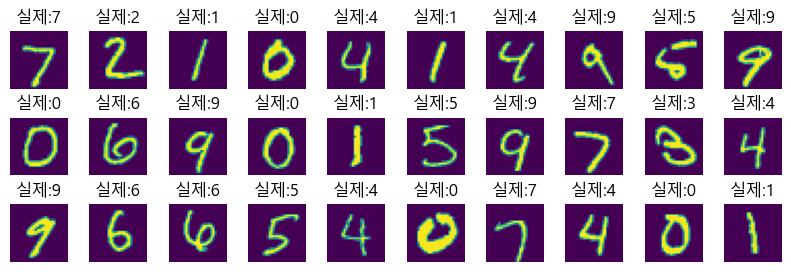

In [23]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col,plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)

plt.rc('font',family='Malgun Gothic') # 윈도우즈 os
# plt.rc('font', family='NanumBarunGothic') # 코랩 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.5, wspace=0.3)
for i in range(plt_row * plt_col):
    # X_test[i]를 axarr[i//plt_col, i%plt_col]에 출력(imshow) Y_test[i].argamx()의 실제값을 title에 출력
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
#     sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('실제:'+str(Y_test[i].argmax()))
    sub_plot.axis('off')

# DNN

In [29]:
# 데이터 셋
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width*height).astype('float32')/255.0
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:그외
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
#원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델 구성
model = Sequential()
model.add(Input(shape=(width*height, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 학습시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                 epochs=300, batch_size=50,
                 validation_data=(X_val, Y_val),
                 callbacks=[early_stop]
                )

Epoch 1/300
1000/1000 [==============================] - 5s 4ms/step - loss: 0.2303 - accuracy: 0.9316 - val_loss: 0.1241 - val_accuracy: 0.9623
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0918 - accuracy: 0.9718 - val_loss: 0.0872 - val_accuracy: 0.9735
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0629 - accuracy: 0.9800 - val_loss: 0.0978 - val_accuracy: 0.9722
Epoch 4/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.1043 - val_accuracy: 0.9708
Epoch 5/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0332 - accuracy: 0.9889 - val_loss: 0.1085 - val_accuracy: 0.9721
Epoch 6/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0283 - accuracy: 0.9909 - val_loss: 0.0964 - val_accuracy: 0.9729
Epoch 7/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0262 - accuracy: 0.9911 - val_loss: 0.0913 - val_ac

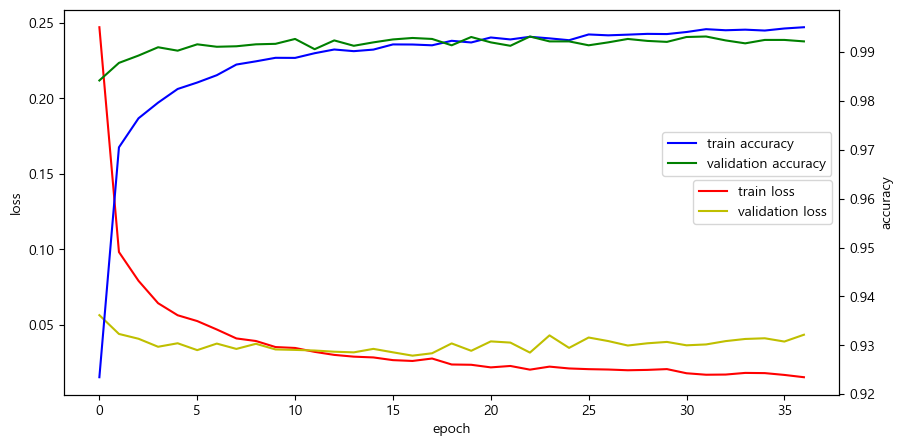

In [60]:
# 5. 학습과정 살펴보기
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [31]:
# 모델 평가
loss,acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 2ms/step - loss: 0.1543 - accuracy: 0.9806


(0.15431082248687744, 0.9805999994277954)

In [36]:
# 성능평가지표 = 교차표
yhat = model.predict(X_test).argmax(axis = 1) # 예측치
# print('예측치:', yhat)
# print('실제값:', np.argmax(Y_test, axis = 1))
print('실제값:', y_test)
pd.crosstab(yhat, y_test)

313/313 [==============================] - 1s 2ms/step
실제값: [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,970,0,2,0,1,2,4,2,4,0
1,1,1130,1,0,2,0,3,5,2,4
2,1,2,1021,8,2,0,0,9,8,2
3,0,1,1,987,1,9,1,1,4,3
4,1,0,1,0,961,0,2,0,3,10
5,1,0,0,5,0,872,1,0,4,5
6,4,0,1,0,5,5,947,0,5,1
7,1,1,3,4,1,0,0,1005,3,4
8,1,1,2,4,3,2,0,2,937,4


In [39]:
from sklearn.metrics import confusion_matrix
cmatrix=confusion_matrix(y_test, yhat)
cmatrix

array([[ 970,    1,    1,    0,    1,    1,    4,    1,    1,    0],
       [   0, 1130,    2,    1,    0,    0,    0,    1,    1,    0],
       [   2,    1, 1021,    1,    1,    0,    1,    3,    2,    0],
       [   0,    0,    8,  987,    0,    5,    0,    4,    4,    2],
       [   1,    2,    2,    1,  961,    0,    5,    1,    3,    6],
       [   2,    0,    0,    9,    0,  872,    5,    0,    2,    2],
       [   4,    3,    0,    1,    2,    1,  947,    0,    0,    0],
       [   2,    5,    9,    1,    0,    0,    0, 1005,    2,    4],
       [   4,    2,    8,    4,    3,    4,    5,    3,  937,    4],
       [   0,    4,    2,    3,   10,    5,    1,    4,    4,  976]],
      dtype=int64)

In [40]:
cnt = 0 # 실제값과 예측값이 다른 갯수
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수 :',cnt)

예측이 틀린 갯수 : 194


In [42]:
# y_hat : 예측치
# y_test : 실제값
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('예측이 틀린 갯수 :',cnt)

예측이 틀린 갯수 : 194


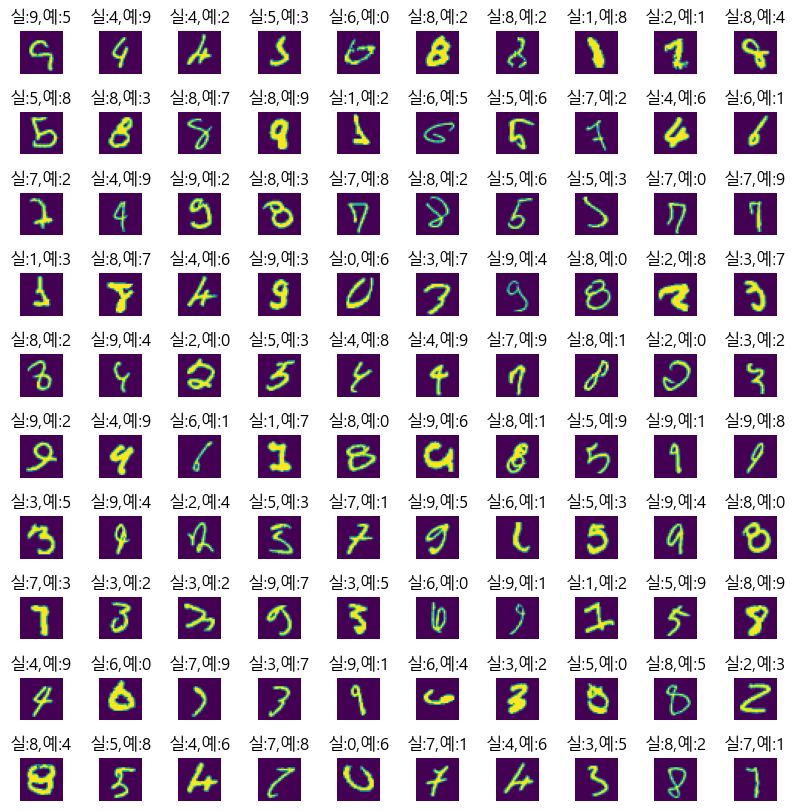

In [49]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 10
plt_col = 10

plt.rcParams['figure.figsize'] = (plt_col, plt_row)

plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.3)

i = 0 # yhat과 y_test를 액세스할 indexx
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(y_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = '실:{},예:{}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i+=1
    cnt+=1

# CNN
- 컨볼루션 레이어 -> max pooling -> DNN (교안 35pt)

In [57]:
# 데이터 셋
width = 28; height = 28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width,height).astype('float32')/255.0
X_test = X_test.reshape(10000, width,height).astype('float32')/255.0
# 훈련셋, 검증셋, 테스트셋 = 50000:10000:그외
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
#원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

# 2. 모델생성
  # Conv(3*3사이즈 커널 32) 28*28 => 26*26*32
  # MaxPooling (2*2 사이즈) 13*13*32
  # Dropout
  # Conv(3*3짜리 커널 16) 11*11*32*64
  # MaxPooling (2*2 사이즈) 6*6*32*64
  # 1차원 데이터로 만들기
  # DNN(hidden layer 128 units 한층-output layer)
model = Sequential()
model.add(Conv2D(32,  # 커널 갯수
                 3,   # 커널 사이즈
                 padding='same',  # 바깥여백이 같도록
                 activation='relu',
                 input_shape=(width, height, 1),  # 1 : 3차원이 되도록
                ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)         

In [58]:
# 3. 학습 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 4. 학습시키기
earlystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                 epochs=50,
                 batch_size=32,
                 validation_data=(X_val, Y_val),
                 callbacks=[earlystop])

Epoch 1/50
1563/1563 [==============================] - 50s 31ms/step - loss: 0.2472 - accuracy: 0.9235 - val_loss: 0.0565 - val_accuracy: 0.9842
Epoch 2/50
1563/1563 [==============================] - 50s 32ms/step - loss: 0.0983 - accuracy: 0.9705 - val_loss: 0.0440 - val_accuracy: 0.9878
Epoch 3/50
1563/1563 [==============================] - 69s 44ms/step - loss: 0.0792 - accuracy: 0.9765 - val_loss: 0.0408 - val_accuracy: 0.9893
Epoch 4/50
1563/1563 [==============================] - 73s 46ms/step - loss: 0.0644 - accuracy: 0.9797 - val_loss: 0.0355 - val_accuracy: 0.9910
Epoch 5/50
1563/1563 [==============================] - 70s 45ms/step - loss: 0.0564 - accuracy: 0.9825 - val_loss: 0.0379 - val_accuracy: 0.9903
Epoch 6/50
1563/1563 [==============================] - 76s 49ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0333 - val_accuracy: 0.9916
Epoch 7/50
1563/1563 [==============================] - 74s 47ms/step - loss: 0.0470 - accuracy: 0.9853 - val_loss: 0.0376 -

In [61]:
model.save('model/CNN.h5')

In [62]:
from tensorflow.keras.models import load_model
model = load_model('model/CNN.h5')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 6, 6, 64)         

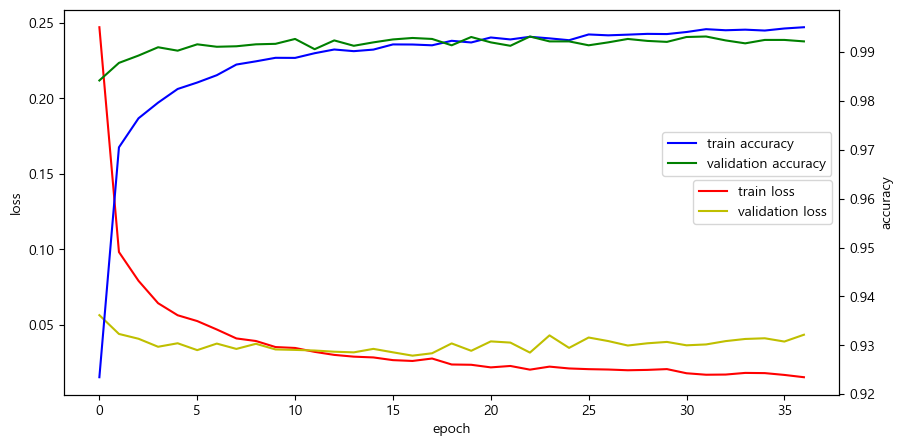

In [67]:
# 5. 학습과정 살펴보기
# 학습과정 표시하기(validation dataset 있는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [65]:
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 2s 7ms/step - loss: 0.0435 - accuracy: 0.9922


(0.04350816458463669, 0.9922000169754028)

In [66]:
# 예측치와 실제값을 이용해서 교차표
yhat = model.predict(X_test).argmax(axis=1)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 2s 7ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1135,0,0,0,0,0,0,0,0
2,1,1,1027,0,0,0,0,3,0,0
3,0,0,1,1004,0,4,0,0,1,0
4,0,0,0,0,978,0,1,0,0,3
5,1,1,0,2,0,884,3,1,0,0
6,1,1,0,0,1,2,952,0,1,0
7,0,3,2,1,0,0,0,1021,1,0
8,1,0,0,0,2,1,0,0,968,2


In [70]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt+=1
print('예측이 틀린 갯수:',cnt)

예측이 틀린 갯수: 67


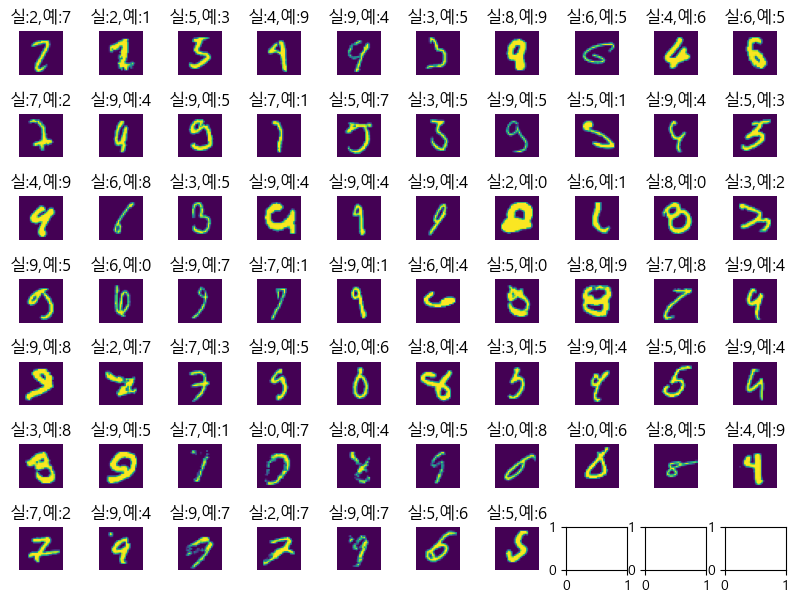

In [71]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 7
plt_col = 10

plt.rcParams['figure.figsize'] = (plt_col, plt_row)

plt.rc('font',family='Malgun Gothic') # 윈도우즈 os

fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.3)

i = 0 # yhat과 y_test를 액세스할 indexx
cnt = 0 # 출력할 횟수
while (cnt<plt_row*plt_col) & (i < len(y_test)):
    # 예측한 결과가 틀렸을 경우만 imshow(y_test[i]), 실제값과 예측치를 title에 출력
    if yhat[i]==y_test[i]:
        i += 1
        continue
    # 예측한 값과 실제값이 다른 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = '실:{},예:{}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i+=1
    cnt+=1